In [12]:
import pandas as pd
import numpy as np 
import re

In [13]:
phishing_raw_df = pd.read_csv("C:/Users/mouni/OneDrive/Documents/SEM 2/Machine Learning/project/source_dataset.csv", header = 0)
phishing_raw_df = phishing_raw_df.dropna()
phishing_raw_df.shape

(95910, 12)

In [14]:
# import lux
# phishing_raw_df

In [15]:
print(phishing_raw_df.info())

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 9.5+ MB
None


In [16]:
phishing_raw_df=phishing_raw_df.drop_duplicates()

In [17]:
import lux
lux.config.default_display = "lux"
lux.config.plotting_backend = "matplotlib"
phishing_raw_df

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95902,www.angelfire.com/tx4/PolkLonghorns/,2547,0,1,8035,36,0,0,0,17,2,0
95903,www.freewebs.com/aylesburyscrabble/index.htm,5001,0,1,8035,44,0,0,0,16,2,0
95905,www.freewebs.com/ryanrules2/,5001,0,1,8035,28,0,0,0,16,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0,0,0,43,0,0,0,29,3,1


In [18]:
phishing_raw_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [19]:
#we can conclude no duplicate values were present
#See if we have any null values present, here True represents the value is null and false represents the data is not null
print( phishing_raw_df.isnull()) 
  
# Count of null values in each column 
print(" \nCount of null values in each column  : \n\n", 
      phishing_raw_df.isnull().sum())


 
Count of null values in each column  : 

 domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64



c:\users\mouni\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


In [20]:
phishing_raw_df.groupby(["label"])[["label"]].count()

c:\users\mouni\appdata\local\programs\python\python37\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,label
label,
0,31025
1,41338


In [21]:
# Function to check for '//' or 'http' in the domain part of the URL
# Returns 1 if '//' is found within length of 7 for the given URL or if 'http' is found else returns 0
# Legitimate - 0; Phishing - 1

def regexp_check(str_to_check,url):
    if str_to_check == '//':
        double_slash = re.search(str_to_check,url)
        if double_slash:
            if double_slash.start() > 7:
                return 1
            else:
                return 0
        else:
            return 0
    else:
        http_domain = re.search('http',url)
        if http_domain:
            return 1
        else:
            return 0

In [22]:
# Feature engineering

# Insert a new column to the dataframe which shows if the URL has a '//' in the domain part.
phishing_raw_df["dslash_Redirect"] = phishing_raw_df["domain"].apply( lambda x: regexp_check('//',x))

# Insert a new column to the dataframe which shows if 'http' is found in the domain part of the URL.
phishing_raw_df["Domain_http"] = phishing_raw_df["domain"].apply( lambda x: regexp_check('http',x))

# Insert a new column to the dataframe indication the length of the URL.
# If the lenght is less than 54 then it is a legitimate site else it is a phishing site.
phishing_raw_df["LongURL"] = phishing_raw_df["domain"].apply( lambda x: 0 if len(x) < 54 else 1)

# Alter the values in 'nosOfSubdomain' column of the dataframe.
# If the number of sub domains is more than 1, then it is a phishing site.
phishing_raw_df["nosOfSubdomain"] = phishing_raw_df["nosOfSubdomain"].apply( lambda x: 0 if x ==1 else 1)

# Alter the values in 'activeDuration' column of the dataframe.
# If the value is greater than 365 (1 year), then it is a legitimate site.
phishing_raw_df["activeDuration"] = phishing_raw_df["activeDuration"].apply( lambda x: 1 if x <= 365 else 0)

# Alter the values in the dataframe column 'ranking'
# If the value is greater than 100000, then it is a phishing site
phishing_raw_df["ranking"] = phishing_raw_df["ranking"].apply( lambda x: 0 if x < 100000 else 1)

# Remove the unwanted columns from the dataframe
phishing_raw_df.drop(['urlLen','domainLen','domain'], inplace=True,axis=1)

# Reorder and rename the columns in the dataframe
#new_columns = ['Domain','Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','dslash_Redirect','Domain_http','LongURL','Label']
Columns = ['Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','Label','dslash_Redirect','Domain_http','LongURL']
new_columns = ['Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','dslash_Redirect','Domain_http','LongURL','Label']
phishing_raw_df.columns = Columns
phishing_raw_df = phishing_raw_df.reindex(columns=new_columns)

#Display the dataset after feature engineering
phishing_raw_df.head()

c:\users\mouni\appdata\local\programs\python\python37\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Rank,isIP,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,LongURL,Label
0,1,0,0,1,0,0,1,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,1,1
3,0,0,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,1,0,0,0,1,1


In [23]:
phishing_raw_df.describe()

c:\users\mouni\appdata\local\programs\python\python37\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Rank,isIP,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,LongURL,Label
count,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000
mean,0.691610,0.000207,0.574727,0.430980,0.002709,0.007504,0.155508,0.767768,0.007476,0.019527,0.389343,0.571259
std,0.461832,0.014396,0.494388,0.495217,0.051974,0.086300,0.362390,0.422259,0.086142,0.138367,0.487605,0.494900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
correlation_matrix=phishing_raw_df.corr()
correlation_matrix

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

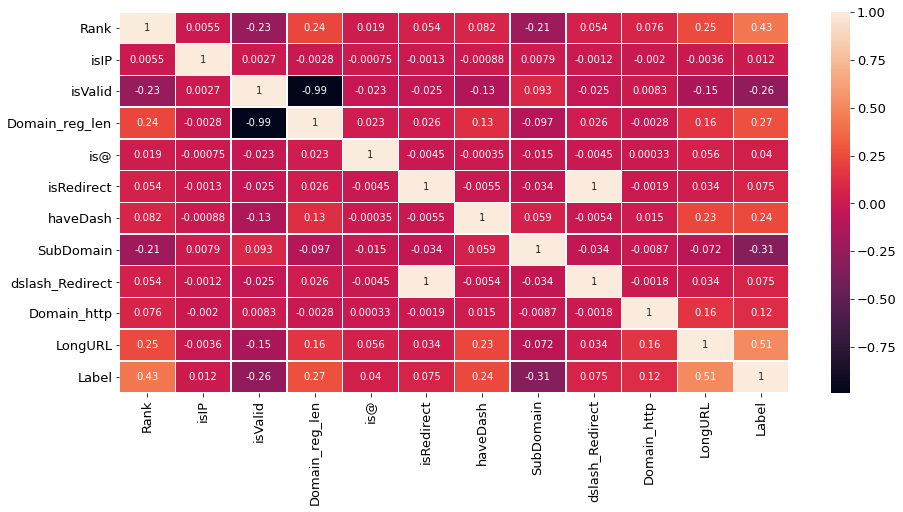

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(phishing_raw_df.corr(),annot=True, linewidth=0.5)